<a href="https://colab.research.google.com/github/huseyin-yigit-ulker/Traffic-Sign-Detector/blob/main/Code/Preprocessing/Data_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True) 
import pandas as pd
import os
import numpy as np
from PIL import Image

Mounted at /content/gdrive/


#Helper Functions

In [2]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
def distribution_images_classes(label_path,labels):
    """
    Calculates the distribution of images across classes based on the provided label path.

    Args:
        label_path (str): The path to the directory containing the label files.
        labels (list): A list of class labels.

    Returns:
        dict: A dictionary containing the distribution of images across classes,
              where the keys are the class labels and the values are the corresponding
              counts of images.
    """
    dist_img_cls = {}
    for filename in os.listdir(label_path):
        with open(os.path.join(label_path, filename), "r") as f:
            cls = f.readlines()
        if not cls:
            continue
        cls = np.array([line.split()[0] for line in cls])
        unique_cls, counts = np.unique(cls, return_counts=True)
        for unique_cl, count in zip(unique_cls, counts):
            dist_img_cls[labels[int(unique_cl)]] = dist_img_cls.get(labels[int(unique_cl)], 0) + count
    return dist_img_cls


In [133]:
def visualize_distribution(dist_img_cls):
    """
    Visualizes the distribution of images across classes.

    Args:
        dist_img_cls (dict): A dictionary containing the distribution of images across classes,
                             where the keys are the class labels and the values are the corresponding
                             counts of images.
    """
    classes = list(dist_img_cls.keys())
    counts = list(dist_img_cls.values())
    plt.figure(figsize = (12,8))
    plt.bar(classes, counts)
    plt.xlabel('Class Labels')
    plt.ylabel('Count')
    plt.title('Distribution of Images across Classes')
    plt.xticks(rotation=90,fontsize = 8)
    plt.show()

In [156]:
def visualize_distribution_pie(dist_img_cls):
    """
    Visualizes the distribution of images across classes using a pie chart.

    Args:
        dist_img_cls (dict): A dictionary containing the distribution of images across classes,
                             where the keys are the class labels and the values are the corresponding
                             counts of images.
    """
    classes = list(dist_img_cls.keys())
    counts = list(dist_img_cls.values())

    filtered_classes = []
    filtered_counts = []

    total_count = sum(counts)
    other_count = 0

    for cls, count in zip(classes, counts):
        ratio = count / total_count
        if ratio > 0.015:
            filtered_classes.append(cls)
            filtered_counts.append(count)
        else:
            other_count += count

    filtered_classes.append('Other')
    filtered_counts.append(other_count)

    fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figure size as desired

    # Plot the pie chart
    ax.pie(filtered_counts, labels=filtered_classes, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')

    # Add spacing between the title and the chart
    ax.set_title('Ratio of Images in Each Class (Ratio > 0.015)', pad=20)

    plt.show()

# Original German Traffic Sign Detection Benchmark Dataset

In [ ]:
ground_truth_path = "/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013/train_data/gt.txt"

In [ ]:
#reading data guides 
data = pd.read_csv(ground_truth_path,sep=';',names=['path','left','top','right','bottom','id'])

In [ ]:
data

,path,left,top,right,bottom,id
0,00000.ppm,774,411,815,446,11
1,00001.ppm,983,388,1024,432,40
2,00001.ppm,386,494,442,552,38
3,00001.ppm,973,335,1031,390,13
4,00002.ppm,892,476,1006,592,39
...,...,...,...,...,...,...
847,00570.ppm,881,416,914,449,9
848,00571.ppm,1287,361,1308,384,17
849,00575.ppm,403,474,435,506,38
850,00593.ppm,584,510,608,534,38



The ground truth file (gt.txt) includes the name of the image file, the bounding box coordinates that specify the position of traffic signs in the image (including the left, top, right, and bottom coordinates), and the identification number representing the class of the traffic sign.

## Load Datasets and Visualize

In [ ]:
train_path = "/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013"
test_path = "/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TestIJCNN2013Download"

In [ ]:
walk_through_dir(train_path)

There are 2 directories and 0 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013'.
There are 43 directories and 0 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013/train_data_traffic_signs'.
There are 0 directories and 21 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013/train_data_traffic_signs/03'.
There are 0 directories and 37 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013/train_data_traffic_signs/07'.
There are 0 directories and 59 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013/train_data_traffic_signs/02'.
There are 0 directories and 47 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013/train_data_traffic_signs/08'.
There are 0 directories and 17 images in '/content/gdrive/MyDrive/Colab Notebooks/Tr

In [ ]:
walk_through_dir(test_path)

There are 0 directories and 295 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TestIJCNN2013Download'.


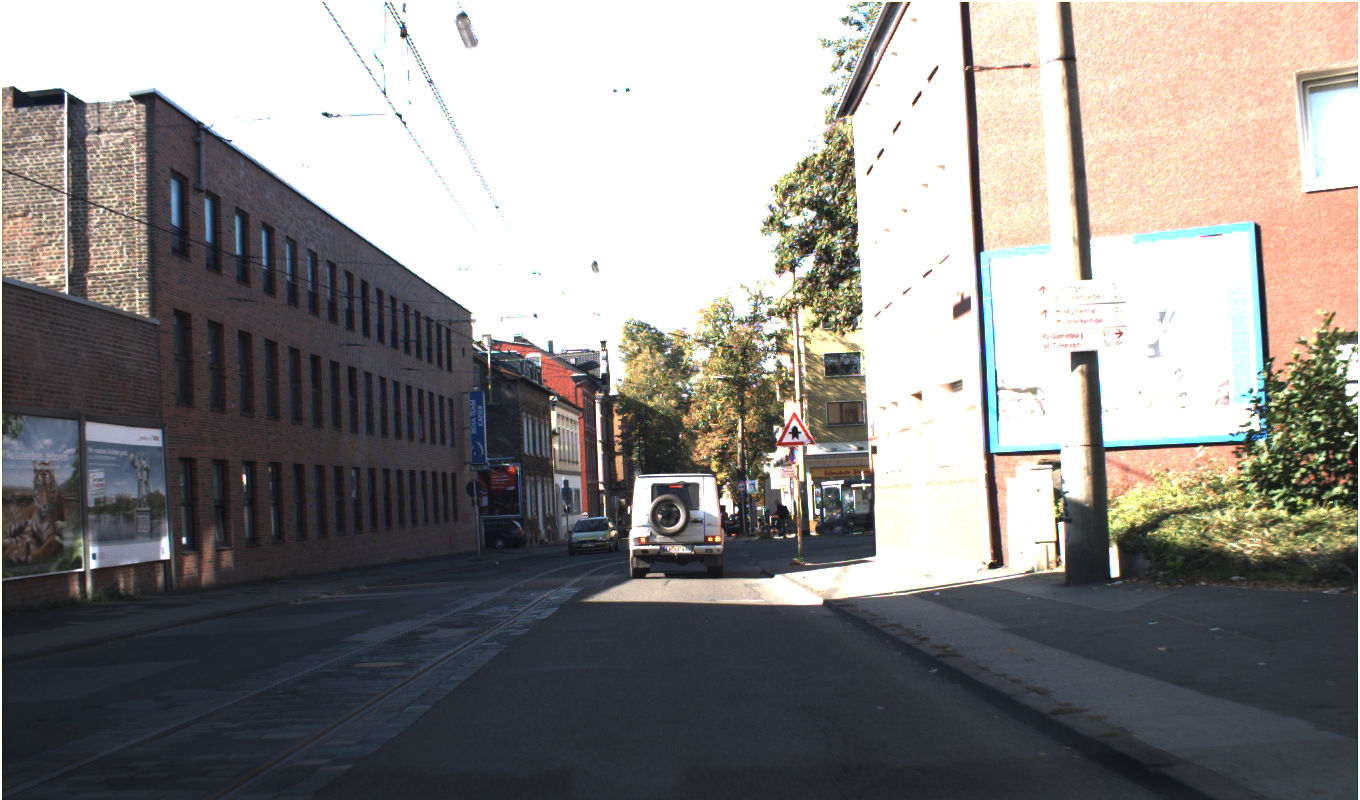

(800, 1360, 3)


In [ ]:
img = Image.open(train_path+"/train_data/"+data['path'][0])
img.show()
img=np.array(img)
print(img.shape)

## Convert ppm to jpg


In [ ]:
import cv2 as cv

In [ ]:
path_dir = "/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013/train_data/"
save_path = "/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/train_data_img"
train_data_df=pd.DataFrame(columns=data.columns)
for current_dir, dirs, files in os.walk(path_dir):
  for f in sorted(files):
    image_name=f[:-4]
    img=cv.imread(path_dir + f)
    single_yolo_dat = data.loc[data['path'] == f].copy()
    # and, in this way, initial dataFrame will not be changed
    # Checking if there is no any annotations for current image
    if single_yolo_dat.isnull().values.all():
        # Removing this image from train data
        # print(f)
        os.remove(path_dir + '/' + f)
        
    #Now save the resulted_frame to a folder inside path_dir
    else:
      train_data_df=train_data_df.append(single_yolo_dat)
      #Now writng and saving the image from ppm format to jpg format using OpenCV
      cv.imwrite(save_path+ '/' + image_name + '.jpg', img)
train_data_df = train_data_df[~train_data_df.index.duplicated(keep='first')];
train_data_df.sort_index(inplace=True);

In [ ]:
walk_through_dir(save_path)

There are 0 directories and 506 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/train_data_img'.


In [ ]:
walk_through_dir(path_dir)

There are 0 directories and 509 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TrainIJCNN2013/train_data/'.


In [ ]:
path_dir = "/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TestIJCNN2013Download/"
save_path = "/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/test_data_img"
test_data_df=pd.DataFrame(columns=data.columns)
for current_dir, dirs, files in os.walk(path_dir):
  for f in files:
    image_name=f[:-4]
    img=cv.imread(path_dir + f)
    single_yolo_dat = data.loc[data['path'] == f].copy()
    # and, in this way, initial dataFrame will not be changed
    # Checking if there is no any annotations for current image
    if single_yolo_dat.isnull().values.all():
        # Removing this image from train data
        # print(f)
        os.remove(path_dir + '/' + f)
        
    #Now save the resulted_frame to a folder inside path_dir
    else:
      final_df=final_df.append(single_yolo_dat)
      #Now writng and saving the image from ppm format to jpg format using OpenCV
      cv.imwrite(save_path+ '/' + image_name + '.jpg', img)
final_df = final_df[~final_df.index.duplicated(keep='first')]
final_df.sort_index(inplace=True)

In [ ]:
walk_through_dir(save_path)

There are 0 directories and 295 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/test_data_img'.


In [ ]:
walk_through_dir(test_path)

There are 0 directories and 295 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset/TestIJCNN2013Download'.


In [ ]:
np.unique(final_df["path"].values).shape

(506,)

In [203]:
dataset_path = "/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset"

In [201]:
labels = ['speed limit 20', 'speed limit 30', 'speed limit 50', 'speed limit 60', 'speed limit 70', 'NO-speed limit 80', 'restriction ends 80', 'speed limit 100', 'speed limit 120', 
'no overtaking', 'no overtaking (trucks)', 'priority at next intersection', 'priority road', 'give way', 'stop', 'no traffic both ways', 'no trucks', 'no entry', 'danger', 
'bend left', 'bend right', 'bend', 'uneven road', 'slippery road', 'road narrows','construction', 'traffic signal', 'pedestrian crossing', 'school crossing', 'cycles crossing', 
'snow', 'animals', 'restriction ends', 'go right', 'go left', 'go straight', 'go right or straight', 'go left or straight', 'keep right', 'keep left', 'roundabout', 
'restriction ends (overtaking)', 'restriction ends (overtaking (trucks))']


In [204]:
dist_imgs_cls =distribution_images_classes(dataset_path+"/train_img/labels/",labels)

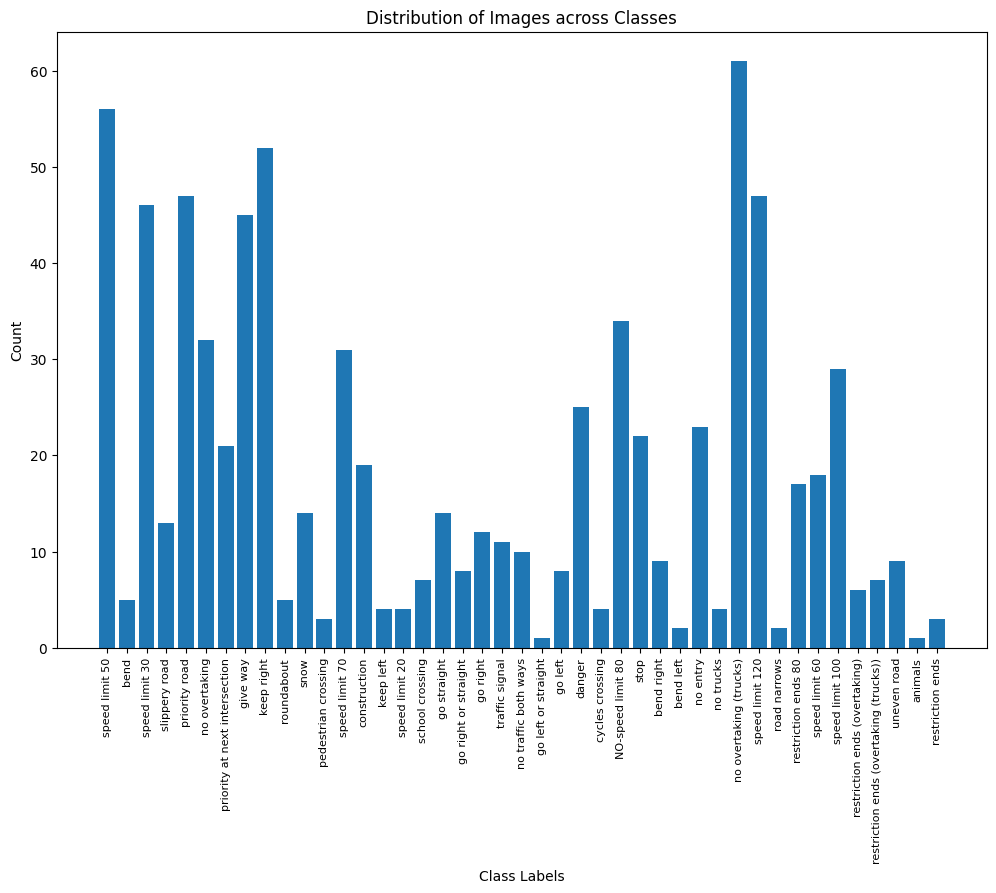

In [205]:
visualize_distribution(dist_imgs_cls) 

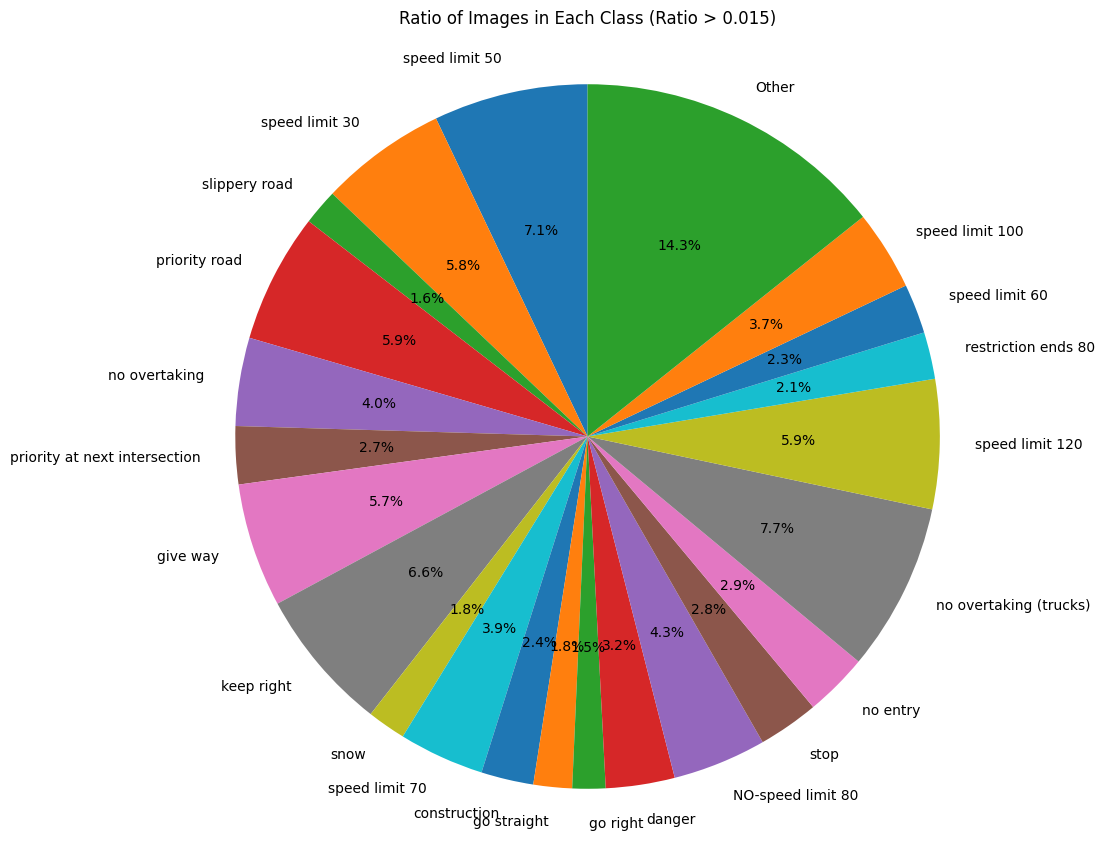

In [206]:
visualize_distribution_pie(dist_imgs_cls)

# traffic-sign-detection-germany Dataset

In [4]:
dataset_path = "/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset3"

In [5]:
walk_through_dir(dataset_path)

There are 3 directories and 3 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset3'.
There are 2 directories and 0 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset3/test'.
There are 0 directories and 54 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset3/test/images'.
There are 0 directories and 54 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset3/test/labels'.
There are 2 directories and 1 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset3/valid'.
There are 0 directories and 108 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset3/valid/labels'.
There are 0 directories and 108 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset3/valid/images'.
There are 2 directories and 1 images in '/content/gdrive/MyDrive/Colab Notebooks/Traffic_Sign_Detection/Dataset3/train'.
There a

In [10]:
labels = ['ANIMALS', 'CONSTRUCTION', 'CYCLES CROSSING', 'DANGER', 'NO ENTRY', 'PEDESTRIAN CROSSING', 'SCHOOL CROSSING', 'SNOW', 'STOP', 'bend left', 'bend right', 'bend', 'give way', 'go left or straight', 'go left', 'go right or straight', 'go right', 'go straight', 'keep left', 'keep right', 'no overtaking (trucks)', 'no overtaking -trucks-', 'no overtaking', 'no traffic both ways', 'no trucks', 'priority at next intersection', 'priority road', 'restriction ends (overtaking (trucks))', 'restriction ends (overtaking)', 'restriction ends -overtaking -trucks--', 'restriction ends -overtaking-', 'restriction ends 80', 'restriction ends', 'road narrows', 'roundabout', 'slippery road', 'speed limit 100', 'speed limit 120', 'speed limit 20', 'speed limit 30', 'speed limit 50', 'speed limit 60', 'speed limit 70', 'speed limit 80', 'traffic signal', 'uneven road']


In [154]:
dist_imgs_cls =distribution_images_classes(dataset_path+"/train/labels/",labels)

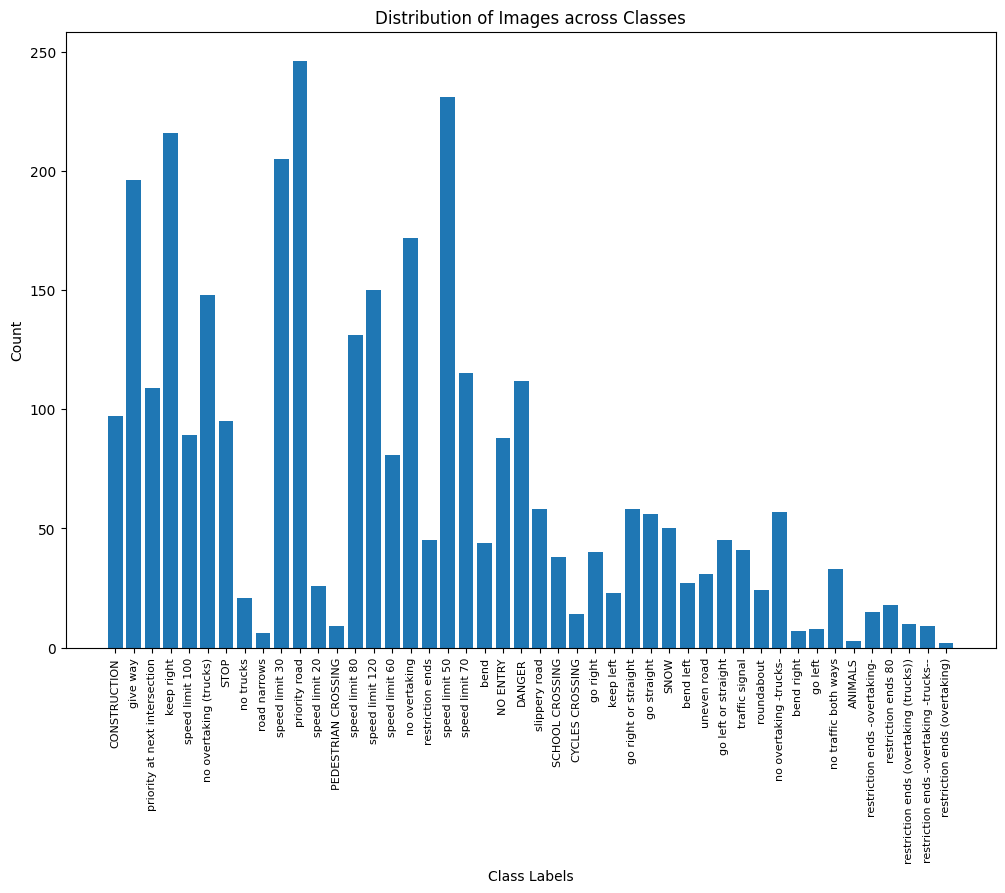

In [134]:
visualize_distribution(dist_imgs_cls)                     

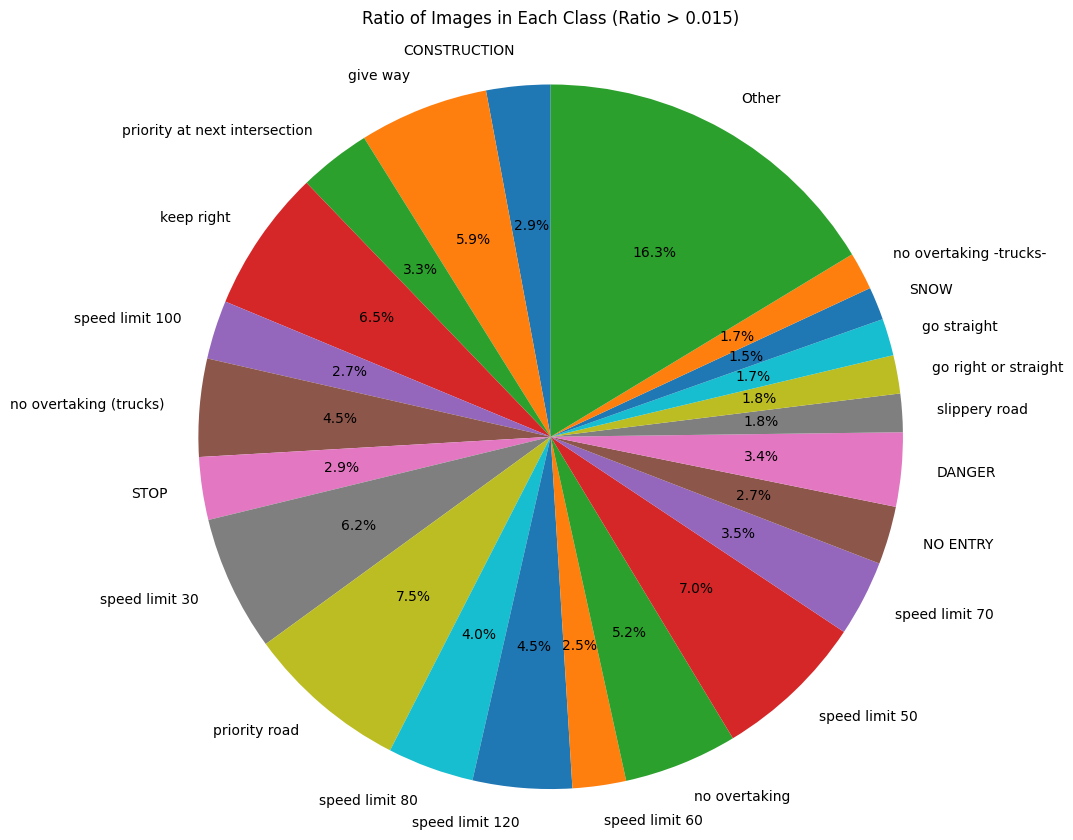

In [157]:
visualize_distribution_pie(dist_imgs_cls)

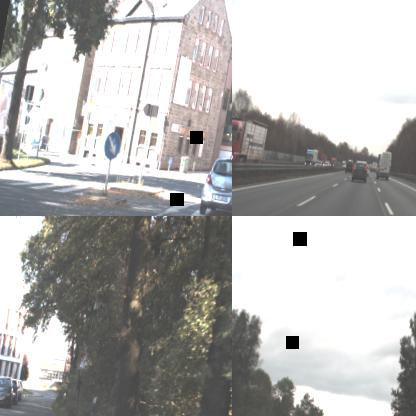

(416, 416, 3)


In [199]:
img = Image.open(dataset_path+"/train/images/00001_jpg.rf.14d63dafd4ed766de3afbb791ac60d16.jpg")
img.show()
img=np.array(img)
print(img.shape)